In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]

In [15]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [16]:
df = pd.DataFrame(data, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [18]:
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score=silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print("\nk={}: Silhouette Score = {:.3f}".format(k,score))


k=2: Silhouette Score = 0.360

k=3: Silhouette Score = 0.245

k=4: Silhouette Score = 0.227

k=5: Silhouette Score = 0.239

k=6: Silhouette Score = 0.229


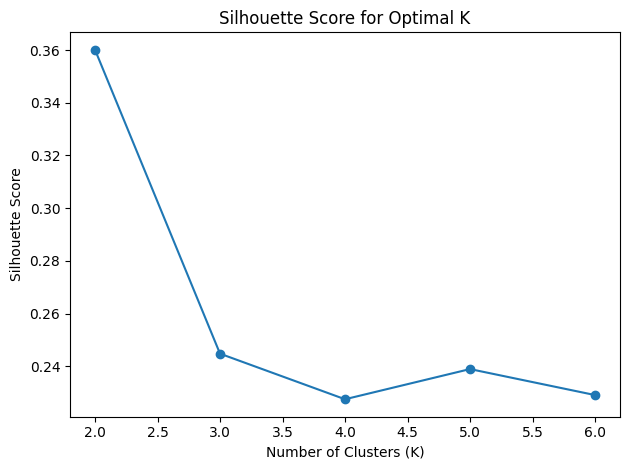

In [19]:
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.tight_layout()
plt.show()

In [20]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = labels 

cluster_means_scaled = df.groupby('Cluster').mean()
print("\n the mean values for all features in each cluster：")
print(cluster_means_scaled)


centroids_scaled = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids_scaled, columns=feature_names)
print("\ncentroid coordinates：")
print(centroids_df)



 the mean values for all features in each cluster：
             CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             LSTAT  
Cluster             
0         9.468298  
1        18.572768  

centroid coordinates：
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.390124  0.262392 -0.620368  0.002912 -0.584675  0.243315 -0.435108   
1  0.725146 -0.487722  1.153113 -0.005412  1.086769 -0.452263  0.808760   

        D